# Ajustes e transformações

Hyndman e Athanasopoulos (2022) argumentam que ajustes aos dados temporais podem ser úteis ao simplificar padrões, remover fontes de variação e tornar a série mais consistente em todo o conjunto de dados. A justificativa é que, de modo geral, padrões mais simples são mais fáceis de modelar e levam a previsões mais precisas.

Da mesma forma que estes autores, vamos lidar aqui com quatro tipos de ajustes:
- ajustes de calendário, 
- ajustes de população, 
- ajustes de inflação e 
- transformações matemáticas.


Vamos começar usando a mesma série de dados de consumo de energia elétrica.

In [3]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aqui também vamos importar a biblioteca seaborn
import seaborn as sns

In [4]:
# Importar dados

# Caso esteja executando este notebook no Google Colab
#from google.colab import files
#arquivo = files.upload()

df = pd.read_csv('dados/consumo_energia_2.csv')

In [5]:
# Ver informações básicas dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   mes_ano                       228 non-null    object 
 1   consumo_energia_eletrica_GWh  228 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.7+ KB


In [6]:
# Definir variável 'datetime'
df['mes_ano'] = pd.to_datetime(df['mes_ano'])
# Definir variável de tempo como indice
df = df.set_index('mes_ano')

In [7]:
# Visualizar
print(df.head())
print(df.tail())

            consumo_energia_eletrica_GWh
mes_ano                                 
2003-01-31                        25.152
2003-02-28                        24.965
2003-03-31                        25.281
2003-04-30                        24.787
2003-05-31                        24.889
            consumo_energia_eletrica_GWh
mes_ano                                 
2021-08-31                        40.629
2021-09-30                        41.985
2021-10-31                        42.622
2021-11-30                        41.932
2021-12-31                        42.937


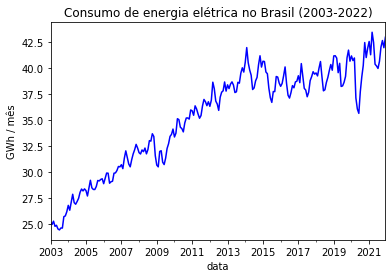

In [8]:
# Plotar dos dados
ax = df['consumo_energia_eletrica_GWh'].plot(color='blue')
# Especificar título para o eixo y (PIB)
ax.set_title('Consumo de energia elétrica no Brasil (2003-2022)')
# Especificar um tótulo para o eixo x
ax.set_xlabel('data')
# Especificar um tótulo para o eixo y (PIB)
ax.set_ylabel('GWh / mês')
# Mostrar gráfico
plt.show()

## 1. Ajustes de calendário

Algumas séries podem apresentar variações em decorrêccia de comportamentos sazonais.


In [9]:
# "Extrair" ano
df['ano'] = pd.DatetimeIndex(df.index).year
# "Extrair" mês
df['mes'] = pd.DatetimeIndex(df.index).month
# Ver no DF
df.head()

,consumo_energia_eletrica_GWh,ano,mes
mes_ano,,,
2003-01-31,25.152,2003,1
2003-02-28,24.965,2003,2
2003-03-31,25.281,2003,3
2003-04-30,24.787,2003,4
2003-05-31,24.889,2003,5


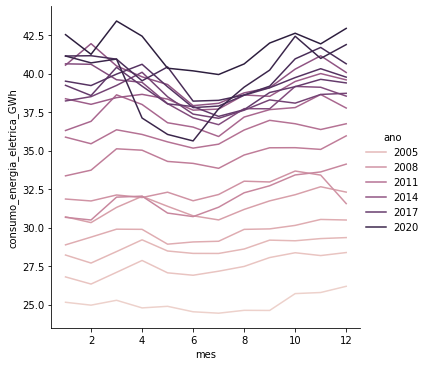

In [10]:
sns.relplot(data=df, x='mes', y='consumo_energia_eletrica_GWh', hue='ano', kind='line');

In [28]:
# Média por mês
df_mes = df.groupby(df['mes'])['consumo_energia_eletrica_GWh'].mean()
df_mes

mes
1     35.219000
2     35.104421
3     35.772368
4     35.457368
5     34.676789
6     34.086789
7     34.147316
8     34.874947
9     35.362000
10    36.013947
11    36.160579
12    36.022211
Name: consumo_energia_eletrica_GWh, dtype: float64

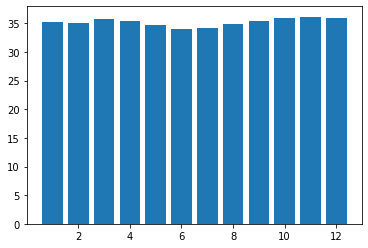

In [27]:
plt.bar(df_mes.index, df_mes);

## 2. Ajustes populacionais

Ajustes populacionais são muito comuns. Quaisquer dados afetados por mudanças populacionais podem ser ajustados para fornecer dados per capita.

PIB a preços básicos (em R$ milhões) - Instituto Brasileiro de Geografia e Estatística, Sistema de Contas Nacionais (IBGE/SCN Anual).

In [37]:
pib = pd.read_csv('dados/pib_pop.csv', sep = ';', encoding='ISO-8859-1')
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ano                         26 non-null     int64  
 1   PIB (R$ milhões correntes)  26 non-null     int64  
 2   População (milhões)         26 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 752.0 bytes


In [38]:
pib = pd.read_csv('dados/pib_pop.csv', sep = ';', encoding='ISO-8859-1', 
                  parse_dates=['ano'], index_col=['ano'])
pib.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 1996-01-01 to 2021-01-01
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PIB (R$ milhões correntes)  26 non-null     int64  
 1   População (milhões)         26 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 624.0 bytes


In [39]:
pib.head()

,PIB (R$ milhões correntes),População (milhões)
ano,,
1996-01-01,854764,163.538
1997-01-01,952089,166.104
1998-01-01,1002350,168.693
1999-01-01,1087710,171.256
2000-01-01,1199090,173.766


Vamos calcular o PIB per capita. Note que os valores de PIB e população estão em milhões.

$$ \text{PIB pc}_t = \frac{\text{PIB}_t}{\text{população}_t} $$

In [40]:
pib['pib_pc'] = pib['PIB (R$ milhões correntes)']/pib['População (milhões)']

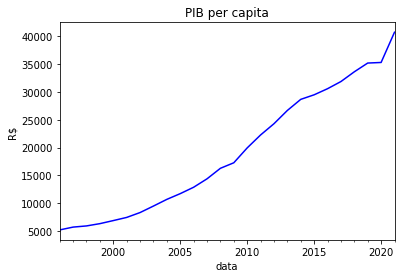

In [41]:
# Plotar dos dados
ax = pib['pib_pc'].plot(color='blue')
# Especificar título para o eixo y (PIB)
ax.set_title('PIB per capita')
# Especificar um tótulo para o eixo x
ax.set_xlabel('data')
# Especificar um tótulo para o eixo y (PIB)
ax.set_ylabel('R$')
# Mostrar gráfico
plt.show()

## 3. Ajustes de preços

Análises com séries de valores monetários são afetadas pelas mudanças do valor do dinheiro ao longo do tempo.

A forma correta de comparar valores monetários ao longo do tempo deve fazer ajustes para corrigir o efeito da inflação.

### 3.1. Inflação

Inflação é o nome dado ao aumento dos preços de produtos e serviços. Ela é calculada pelos índices de preços.
Existem inúmeros índices de preços. O IBGE produz dois dos mais importantes índices de preços: o IPCA, considerado o oficial pelo governo federal, e o INPC.

Outros dois índices muito utilizados são o IGP-M e o IGP-DI, calculados pela Fundação Getúlio Vargas.




### 3.2. Cálculo de valores reais

Valores monetários devem ser ajustados antes de qualquer modelagem.

Normalmente, a maioria das séries são publicadas com valores nominais. Para fazer essse tipo de ajuste é necessário o uso de algum índice de preços. 

$$ pr_{t, s} = pn_t \cdot \frac{I_s}{I_t} $$

Onde:
- $pr_{t, s}=$ preço real observado no período $t$ em valores do período $s$
- $pn_t=$ preço nominal observado no período $t$
- $I_s=$ índice de preço no período $s$
- $I_t=$ índice de preço no período $t$





In [67]:
rend = pd.read_excel('dados/rendimentos_pnadc.xlsx')
rend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   data                   120 non-null    object
 1   rendimento médio (R$)  120 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [68]:
rend.head()

,data,rendimento médio (R$)
0,2012-03,1500
1,2012-04,1420
2,2012-05,1424
3,2012-06,1433
4,2012-07,1445


In [69]:
rend['data'] = pd.to_datetime(rend['data'], format='%Y-%m').dt.strftime('%Y-%m')
rend = rend.set_index('data')
rend.head()

,rendimento médio (R$)
data,
2012-03,1500
2012-04,1420
2012-05,1424
2012-06,1433
2012-07,1445


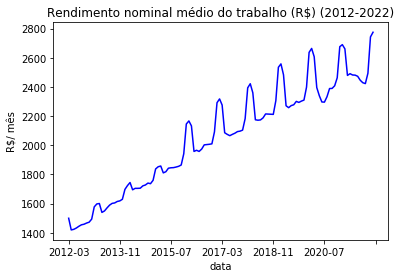

In [72]:
# Plotar dos dados
ax = rend['rendimento médio (R$)'].plot(color='blue')
# Especificar título para o eixo y (PIB)
ax.set_title('Rendimento nominal médio do trabalho (R$) (2012-2022)')
# Especificar um tótulo para o eixo x
ax.set_xlabel('data')
# Especificar um tótulo para o eixo y (PIB)
ax.set_ylabel('R$/ mês')
# Mostrar gráfico
plt.show()

## 4. Transformações matemáticas


**4.1. Logaritmo**


**4.2. Potências**


**4.3. Transformação de Box-Cox**

A família de transformações Box-Cox (Box & Cox, 1964) é amplamente utilizada, pois permite identificar a melhor transformação, com base no ajuste do valor de um parâmetro definido como $\lambda$: 

A transformação é definida da seguinte forma:

$$
\begin{equation}
  z_t  =
    \begin{cases}
      \log(y_t) & \text{se $\lambda=0$};  \\
      \frac{|y_t|^\lambda-1)}{\lambda} & \text{caso contrário}.
    \end{cases}
\end{equation}
$$

O logaritmo em uma transformação Box-Cox é sempre um logaritmo natural (ou seja, para base $\epsilon$). Então se 
$\lambda=0$, logaritmos naturais são usados, mas se $\lambda \ne 0$, uma transformação de potência é usada, seguida por um deslocamento simples.

Se $\lambda=1$, então $z_t=y_t−1$, de modo que os dados transformados são deslocados para baixo, mas não há alteração na forma da série temporal. Para todos os outros valores de $\lambda$, a série temporal mudará de forma.

- BOX GEP; COX DR. 1964. An analysis of transformations. Journal of the Royal Society 26: 211-252.